In [3]:
import GEOparse
import pandas as pd
import seaborn as sns
def download_experiment(experiment):
    GEOparse.get_GEO(geo=experiment, destdir="data/")

def read_experiment(experiment):
    return GEOparse.get_GEO(filepath="data/" + experiment + "_family.soft.gz")

def aggregate_samples(experiment):
    # download_experiment(experiment)
    print('reading experiment...')
    gse = read_experiment(experiment)
    aggregated_samples = pd.DataFrame()
    genes = pd.DataFrame()
    print('aggregating samples...')
    for sample in gse.gsms:
        name = gse.gsms[sample].metadata['title'][0]
        sample_df = gse.gsms[sample].table
        sample_df.columns = ['gene', name]
        genes = sample_df['gene']
        aggregated_samples = pd.concat([aggregated_samples, sample_df[name]], axis=1)    
    aggregated_samples = pd.concat([genes, aggregated_samples], axis=1)
    aggregated_samples.to_csv('data/' + experiment + '_full_matrix.csv') 
    print('aggregated samples written to csv file')

In [1]:
eichenberger = 'GSE67023'
download_experiment(eichenberger)
aggregate_samples(eichenberger)

NameError: name 'download_experiment' is not defined

In [21]:
df=pd.read_csv('data/' + eichenberger + '_full_matrix.csv')

In [22]:
df1=df.transpose()
df1.columns = df1.iloc[1]
df2=df1.drop(['Unnamed: 0', 'gene'])
df2=df2.astype(float)
df2=df2.fillna(-85)

In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Heatmap 

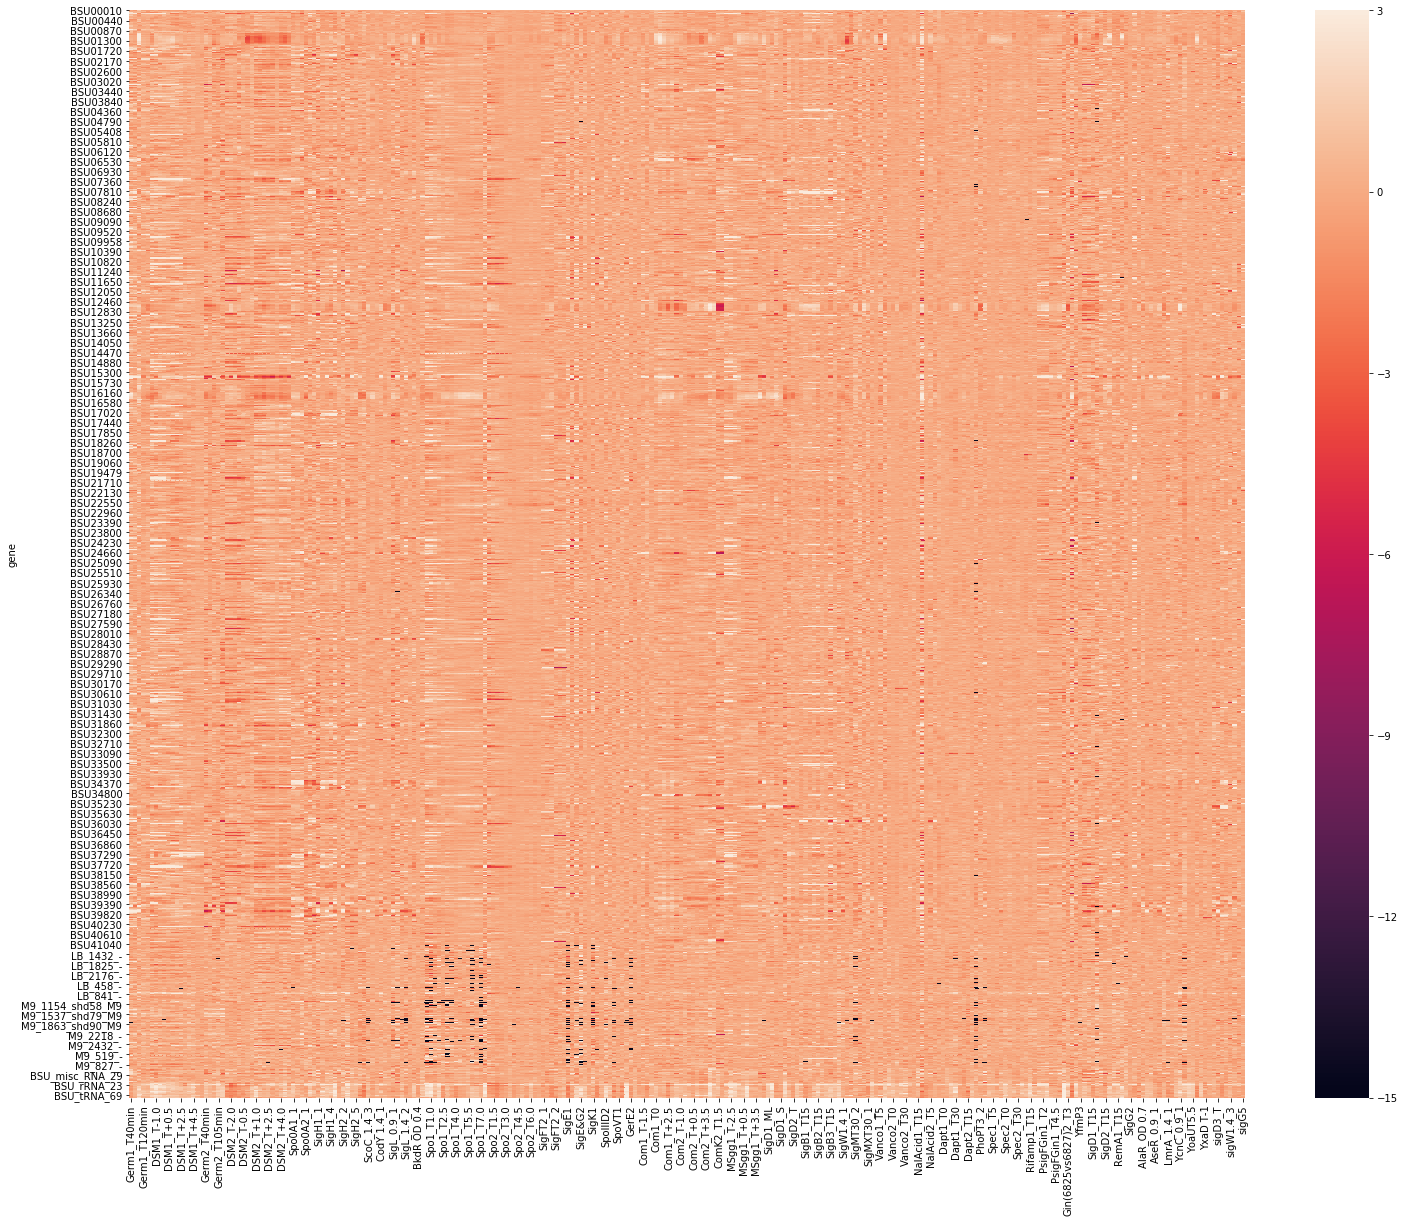

In [90]:
df=df.set_index('gene')
df=df.drop(['Unnamed: 0'],axis=1)
df=df.astype(float)
df=df.fillna(-80)
plt.figure(figsize=(25, 20))
sns.heatmap(df, vmin=-15, vmax=3)

# K-means clustering

In [8]:
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import collections

In [160]:
x=df.as_matrix()
pca = PCA(n_components=3).fit(x)
x_pca=pca.transform(x)

/home/cecilia/miniconda3/envs/ml2labs/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


In [96]:
AP = AffinityPropagation(damping = 0.5, max_iter = 250, affinity = 'euclidean').fit(x)

In [98]:
len(AP.cluster_centers_)

478

In [102]:
labels=AP.fit_predict(x)
center=AP.cluster_centers_
center_index=list(AP.cluster_centers_indices_)

In [122]:
#Store the index of genes
d = collections.defaultdict(list)
for i,v in enumerate(labels):
    d[v].append(i)

In [132]:
AP.fit_predict(x)

array([  2,   2,   2, ..., 475, 201, 477])

In [105]:
tsne_results.shape

(478, 2)

In [104]:
import time

from sklearn.manifold import TSNE

n_sne = x.shape[1]

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(AP.cluster_centers_)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 478 samples in 0.006s...
[t-SNE] Computed neighbors for 478 samples in 0.120s...
[t-SNE] Computed conditional probabilities for sample 478 / 478
[t-SNE] Mean sigma: 7.062928
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.877266
[t-SNE] Error after 300 iterations: 1.148003


In [161]:
#df_tsne=pd.DataFrame()
#df_tsne['x-tsne'] = 1
#df_tsne['y-tsne'] = 2


df_tsne = pd.DataFrame(np.random.randint(low=0, high=10, size=(4657, 3)), columns=['x-tsne', 'y-tsne','label'])

In [162]:
for i in range(x.shape[0]):
    cluster_number=labels[i]
    x=tsne_results[cluster_number][0]
    y=tsne_results[cluster_number][1]
    df_tsne['x-tsne'][i] = x
    df_tsne['y-tsne'][i] = y
    df_tsne['label'][i] = cluster_number

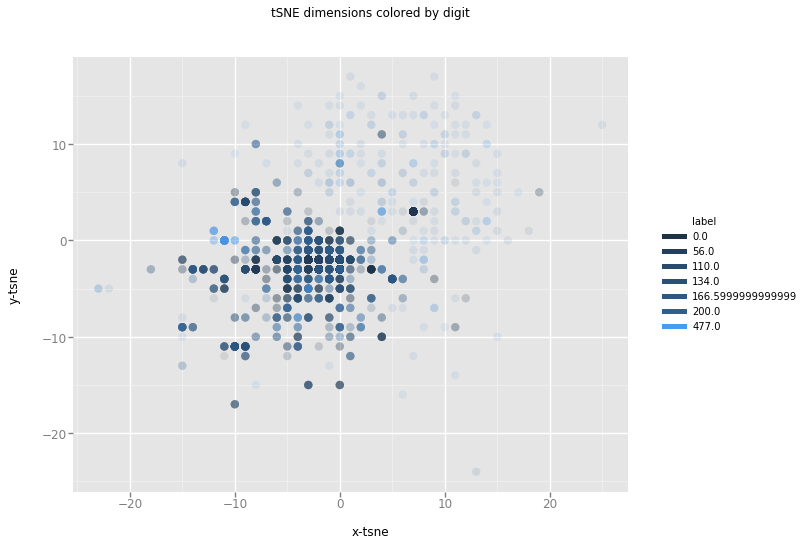

<ggplot: (-9223363285797269539)>

In [180]:

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit") 
chart


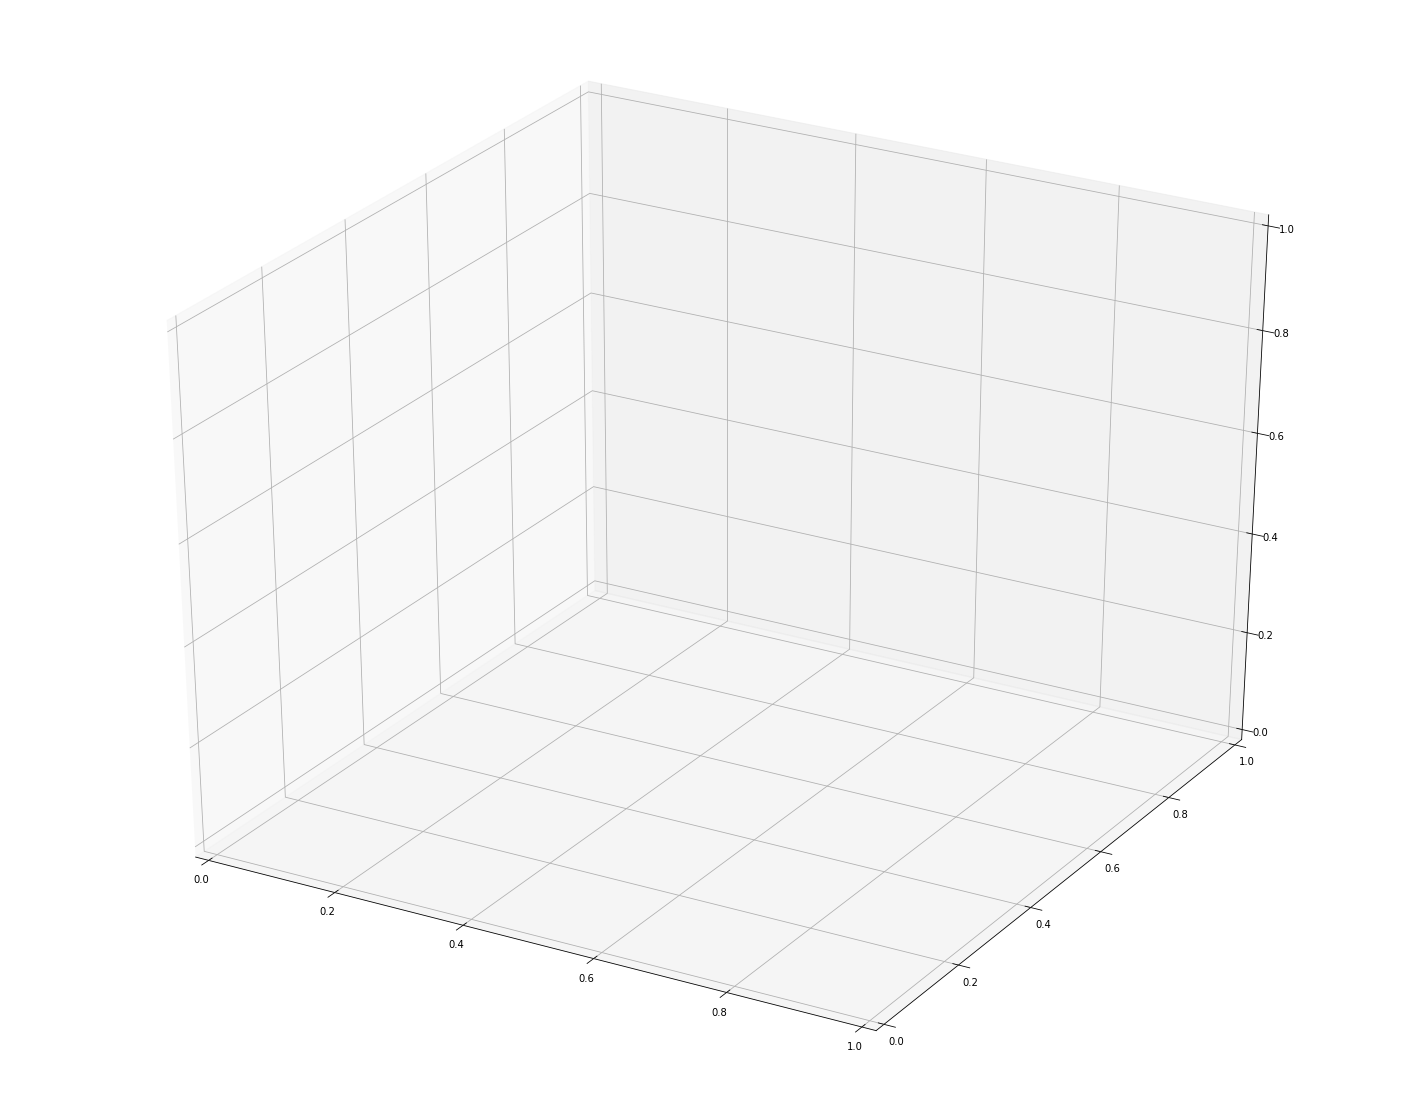

In [177]:
fig = plt.figure(figsize=(25, 20))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs, ys, zs, c=c, marker=m)

